In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [17]:
#read data, split into datasets for the home teams and away teams
df = pd.read_csv('fullDataDifferences.csv')
df_home_differences = df[df['team_side'] == 'Home'].filter(regex = 'runs|h_minus_p')
df_away_differences = df[df['team_side'] == 'Away'].filter(regex = 'runs|h_minus_p')

In [18]:
#Preview data
df_home_differences.head()

,runs,pitches_h_minus_p,ba_h_minus_p,iso_h_minus_p,babip_h_minus_p,slg_h_minus_p,woba_h_minus_p,xwoba_h_minus_p,xba_h_minus_p,hits_h_minus_p,...,launch_speed_h_minus_p,launch_angle_h_minus_p,spin_rate_h_minus_p,velocity_h_minus_p,effective_speed_h_minus_p,whiffs_h_minus_p,swings_h_minus_p,takes_h_minus_p,eff_min_vel_h_minus_p,release_extension_h_minus_p
1,9,-38,-0.071,-0.145,-0.057,-0.217,-0.132,-0.121,-0.093,-4,...,3.5,-5.1,-144,1.3,5.16,6,-6,-32,3.8,-0.13
2,4,-9,0.062,0.000,0.005,0.062,0.046,0.048,0.046,2,...,2.4,-1.0,122,1.8,2.65,-9,0,-9,0.8,0.56
4,4,-13,0.012,0.049,0.090,0.061,-0.005,-0.063,-0.045,1,...,4.0,-10.2,101,-2.1,3.59,10,-3,-10,5.7,-0.09
7,2,-4,-0.156,-0.032,-0.169,-0.188,-0.119,0.000,-0.077,-7,...,-0.9,7.0,244,0.7,0.88,2,-1,-3,0.2,0.13
8,0,-29,-0.223,-0.017,-0.268,-0.240,-0.129,-0.076,-0.132,-9,...,-5.8,-9.8,37,3.9,5.05,4,-18,-11,1.1,0.70


In [19]:
#Numeric column summaries
df_home_differences.describe()

,runs,pitches_h_minus_p,ba_h_minus_p,iso_h_minus_p,babip_h_minus_p,slg_h_minus_p,woba_h_minus_p,xwoba_h_minus_p,xba_h_minus_p,hits_h_minus_p,...,launch_speed_h_minus_p,launch_angle_h_minus_p,spin_rate_h_minus_p,velocity_h_minus_p,effective_speed_h_minus_p,whiffs_h_minus_p,swings_h_minus_p,takes_h_minus_p,eff_min_vel_h_minus_p,release_extension_h_minus_p
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,4.596296,-6.323868,0.008563,0.009891,0.005708,0.018480,0.011229,0.007556,0.005118,-0.163374,...,0.136749,0.505967,-3.143621,0.061893,0.060527,-1.216461,-3.162140,-3.161728,-0.001811,0.005934
std,3.150994,26.716295,0.111600,0.149311,0.133764,0.226138,0.126954,0.096763,0.076794,4.681021,...,4.414282,9.294926,181.725061,2.493835,2.711457,7.531467,13.106997,19.611432,0.847035,0.413910
min,0.000000,-112.000000,-0.373000,-0.526000,-0.458000,-0.651000,-0.396000,-0.278000,-0.243000,-21.000000,...,-14.200000,-29.400000,-701.000000,-9.100000,-10.940000,-24.000000,-54.000000,-71.000000,-11.900000,-1.490000
25%,2.000000,-24.000000,-0.069000,-0.091750,-0.084000,-0.133000,-0.074750,-0.059750,-0.047000,-3.000000,...,-2.900000,-5.600000,-126.000000,-1.600000,-1.710000,-6.000000,-12.000000,-17.000000,-0.500000,-0.280000
50%,4.000000,-6.000000,0.006000,0.006000,0.002500,0.018500,0.012000,0.004000,0.004000,0.000000,...,0.200000,0.300000,-4.000000,0.000000,0.000000,-1.000000,-3.000000,-3.000000,0.000000,0.010000
75%,6.000000,12.000000,0.085000,0.108000,0.096000,0.173000,0.100000,0.073750,0.057000,3.000000,...,3.200000,6.600000,121.500000,1.700000,1.857500,4.000000,6.000000,10.000000,0.500000,0.280000
max,20.000000,86.000000,0.389000,0.500000,0.489000,0.839000,0.479000,0.335000,0.304000,16.000000,...,16.300000,41.900000,563.000000,8.600000,9.360000,28.000000,40.000000,62.000000,5.700000,1.340000


In [20]:
#Check for null values
print(df_home_differences.isna().sum())

runs                           0
pitches_h_minus_p              0
ba_h_minus_p                   0
iso_h_minus_p                  0
babip_h_minus_p                0
slg_h_minus_p                  0
woba_h_minus_p                 0
xwoba_h_minus_p                0
xba_h_minus_p                  0
hits_h_minus_p                 0
abs_h_minus_p                  0
launch_speed_h_minus_p         0
launch_angle_h_minus_p         0
spin_rate_h_minus_p            0
velocity_h_minus_p             0
effective_speed_h_minus_p      0
whiffs_h_minus_p               0
swings_h_minus_p               0
takes_h_minus_p                0
eff_min_vel_h_minus_p          0
release_extension_h_minus_p    0
dtype: int64


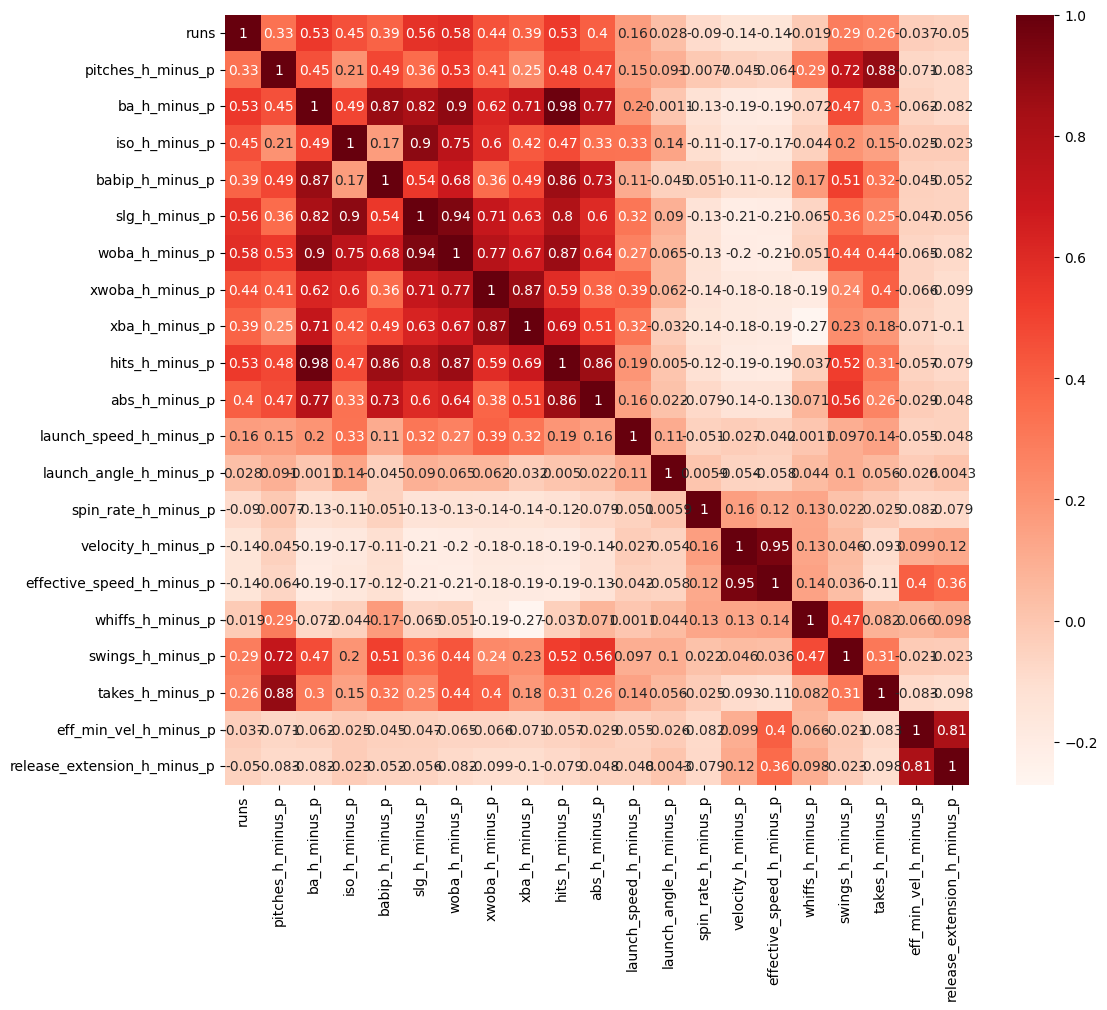

In [23]:
#plot a correlation matrix
plt.figure(figsize=(12,10))
cor = df_home_differences.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
#Our model will try to predict home team runs using the difference between the home and away team's hitting metrics 
#
#See what variables are most correlated to runs
cor_target = abs(cor["runs"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

runs              1.000000
ba_h_minus_p      0.534867
slg_h_minus_p     0.563752
woba_h_minus_p    0.583846
hits_h_minus_p    0.528693
Name: runs, dtype: float64

In [26]:
#create explanatory and response variable subsets
x_home = df_home_differences[['ba_h_minus_p',
 'slg_h_minus_p',
 'woba_h_minus_p',
 'hits_h_minus_p']]
y_home = df_home_differences[['runs']]

In [27]:
#Split data into training and test sets
x_home_train, x_home_test, y_home_train, y_home_test = train_test_split(x_home, y_home, test_size = 0.2)

In [28]:
#Initialize Linear Model
model = LinearRegression()

In [29]:
#Fit a model to the training data and output a dataframe of the coefficients
model.fit(x_home_train, y_home_train)
pd.DataFrame(data = np.transpose(model.coef_), index = x_home.columns, columns = ['Coeff'])

,Coeff
ba_h_minus_p,-5.065161
slg_h_minus_p,1.624190
woba_h_minus_p,9.787101
hits_h_minus_p,0.181020


In [30]:
#Predict test set values
predictions = model.predict(x_home_test)

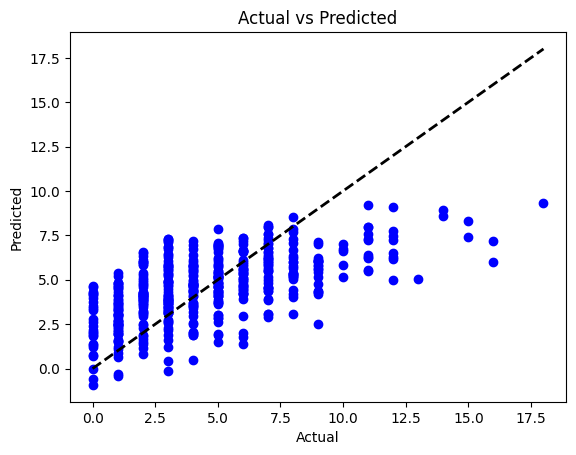

In [31]:
#Scatter plot comparing actual values to predicted values
plt.scatter(y_home_test, predictions, color='blue')
plt.plot([y_home_test.min(), y_home_test.max()], [y_home_test.min(), y_home_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [35]:
#Check MSE
metrics.mean_squared_error(y_home_test, predictions)

6.31830779836531

In [79]:
#Try a polynomial model instead
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly_features.fit_transform(x_home_train)
x_test_poly = poly_features.transform(x_home_test)

In [80]:
#Initialize and fit new model
model2 = LinearRegression()
model2.fit(x_train_poly, y_home_train)

LinearRegression()

In [81]:
#Using the created model, predict the y-values of the test data
predictions = model2.predict(x_test_poly)

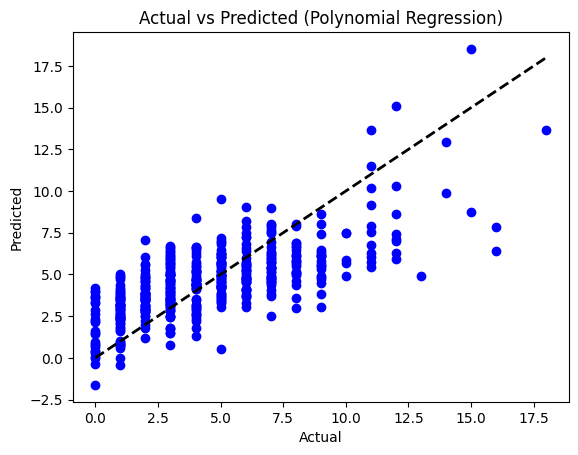

In [82]:
#Scatter plot comparing actual values to predicted values
plt.scatter(y_home_test, predictions, color='blue')
plt.plot([y_home_test.min(), y_home_test.max()], [y_home_test.min(), y_home_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()

In [83]:
#After testing polynomial models with degree 2-6, degree 3 produced the lowest MSE
metrics.mean_squared_error(y_home_test, predictions)

5.046413758974352